In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download("rashikrahmanpritom/plant-disease-recognition-dataset")

print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download("saroz014/plant-disease")

print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download("karagwaanntreasure/plant-disease-detection")

print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download("hsmcaju/d-kap")

print("Path to dataset files:", path) 

# Download latest version
path = kagglehub.dataset_download("sadmansakibmahi/plant-disease-expert")

print("Path to dataset files:", path) 

# Download latest version
path = kagglehub.dataset_download("alinedobrovsky/plant-disease-classification-merged-dataset")

print("Path to dataset files:", path) 

# Download latest version
path = kagglehub.dataset_download("nirmalsankalana/plant-diseases-training-dataset")

print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download("hafiznouman786/potato-plant-diseases-data")

print("Path to dataset files:", path) 

# Download latest version
path = kagglehub.dataset_download("dhamur/cotton-plant-disease")

print("Path to dataset files:", path)

# Download latest version
path = kagglehub.dataset_download("kushagra3204/wheat-plant-diseases")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/new-plant-diseases-dataset
Path to dataset files: /kaggle/input/plant-disease-recognition-dataset
Path to dataset files: /kaggle/input/plant-disease
Path to dataset files: /kaggle/input/plant-disease-detection
Path to dataset files: /kaggle/input/d-kap
Path to dataset files: /kaggle/input/plant-disease-expert
Path to dataset files: /kaggle/input/plant-disease-classification-merged-dataset
Path to dataset files: /kaggle/input/plant-diseases-training-dataset
Path to dataset files: /kaggle/input/potato-plant-diseases-data
Path to dataset files: /kaggle/input/cotton-plant-disease
Path to dataset files: /kaggle/input/wheat-plant-diseases


# **THE PART WHICH HELP ME IDENTIFY TOTAL CLASSES IN THE DATASETS**

In [2]:
import os
import time
import kagglehub
from collections import defaultdict

# ==============================================================================
# STEP 0: CONFIGURATION
# Define the datasets to scan.
# ==============================================================================
print("--- Step 0: Initializing Configuration ---")

# [FINAL VERSION] The paths have been corrected based on the debug output from the last run.
# A duplicate dataset has also been removed.
DATASET_SOURCES = {
    'vipoooool/new-plant-diseases-dataset': 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    'rashikrahmanpritom/plant-disease-recognition-dataset': 'Train/Train',
    'saroz014/plant-disease': 'dataset/train',
    'karagwaanntreasure/plant-disease-detection': 'Dataset/train',
    'hsmcaju/d-kap': 'APPLE_DISEASE_DATASET/train',
    'alinedobrovsky/plant-disease-classification-merged-dataset': '', # Images are in the root directory
    'nirmalsankalana/plant-diseases-training-dataset': 'data',
    'hafiznouman786/potato-plant-diseases-data': 'PlantVillage',
    'dhamur/cotton-plant-disease': 'Cotton plant disease/train',
    'kushagra3204/wheat-plant-diseases': 'data/train',
}

# ==============================================================================
# STEP 1: DOWNLOAD DATASETS USING KAGGLEHUB
# ==============================================================================
print("\n--- Step 1: Downloading Datasets with Retries ---")
source_paths = {}
for handle in DATASET_SOURCES.keys():
    for attempt in range(3): # Try up to 3 times
        try:
            print(f"Downloading: {handle} (Attempt {attempt + 1})...")
            path = kagglehub.dataset_download(handle)
            print(f"  -> Successfully downloaded to: {path}")
            source_paths[handle] = path
            break # Exit the retry loop on success
        except Exception as e:
            print(f"  !!! ATTEMPT {attempt + 1} FAILED for {handle}: {e}")
            if attempt < 2:
                print("      Retrying in 5 seconds...")
                time.sleep(5)
            else:
                print(f"      All attempts failed for {handle}. Skipping this dataset.")

print("\nAll datasets downloaded.")

# ==============================================================================
# STEP 2: DISCOVER AND REPORT ALL UNIQUE CLASS FOLDERS
# ==============================================================================
print("\n--- Step 2: Discovering All Unique Class Names ---")
discovered_classes = set()
classes_by_source = defaultdict(list)

for handle, downloaded_path in source_paths.items():
    prefix = DATASET_SOURCES[handle]
    base_path = os.path.join(downloaded_path, prefix)
    
    if not os.path.isdir(base_path):
        print(f"  [!] Warning: Could not find image folder for {handle}. Looked for: {base_path}")
        print(f"      - Contents of '{downloaded_path}': {os.listdir(downloaded_path)}")
        continue
    
    # List subdirectories, which are assumed to be the class names
    for class_name in os.listdir(base_path):
        class_path = os.path.join(base_path, class_name)
        if os.path.isdir(class_path):
            discovered_classes.add(class_name)
            if class_name not in classes_by_source[handle]:
                 classes_by_source[handle].append(class_name)

# ==============================================================================
# STEP 3: PRINT THE FINAL REPORT
# ==============================================================================
print("\n" + "="*50)
print("          CLASS DISCOVERY REPORT")
print("="*50)

print(f"\nFound a total of {len(discovered_classes)} unique raw class names across all datasets.")
print("Here is the complete, alphabetized list:")
print("-" * 30)

# Print the alphabetized master list
for i, class_name in enumerate(sorted(list(discovered_classes))):
    print(f"{i+1:03d}: {class_name}")

print("\n" + "="*50)
print("Breakdown by Dataset Source:")
print("="*50)

for handle, class_list in classes_by_source.items():
    print(f"\n--- {handle} ({len(class_list)} classes) ---")
    for class_name in sorted(class_list):
        print(f"  - {class_name}")

print("\n\nUse this final, complete list to build the 'map' in your main data processing script.")



--- Step 0: Initializing Configuration ---

--- Step 1: Downloading Datasets with Retries ---
Downloading: vipoooool/new-plant-diseases-dataset (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/new-plant-diseases-dataset
Downloading: rashikrahmanpritom/plant-disease-recognition-dataset (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/plant-disease-recognition-dataset
Downloading: saroz014/plant-disease (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/plant-disease
Downloading: karagwaanntreasure/plant-disease-detection (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/plant-disease-detection
Downloading: hsmcaju/d-kap (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/d-kap
Downloading: alinedobrovsky/plant-disease-classification-merged-dataset (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/plant-disease-classification-merged-dataset
Downloading: nirmalsankalana/plant-diseases-training-dataset (Attempt 1)...
  

# **Master Data Processing**

In [3]:
import os
import shutil
import random
import time
import kagglehub
import pandas as pd
from PIL import Image
from tqdm import tqdm

# ==============================================================================
# STEP 0: FINAL CONFIGURATION
# ==============================================================================
print("--- Step 0: Initializing Final Configuration ---")

MASTER_DIR = './Drishti_AI_Master_Dataset_v1'
SPLIT_RATIO = (0.8, 0.1, 0.1)  # 80% train, 10% validation, 10% test

TARGET_SIZE = (256, 256)
TARGET_MODE = "RGB"
TARGET_FORMAT = "JPEG"

# This is the master map, built from the discovery script's output.
# It intelligently merges all variations into single, clean class names.
MASTER_CLASS_MAP = {
    # Apple Diseases
    'Apple___Apple_scab': 'Apple_Scab', 'Apple___scab': 'Apple_Scab', 'Apple__scab': 'Apple_Scab',
    'Apple___Black_rot': 'Apple_Black_Rot', 'Apple__black_rot': 'Apple_Black_Rot',
    'Apple___Cedar_apple_rust': 'Apple_Cedar_Rust', 'Apple___rust': 'Apple_Cedar_Rust', 'Apple__rust': 'Apple_Cedar_Rust',
    'Apple___alternaria_leaf_spot': 'Apple_Alternaria_Leaf_Spot', 'Apple___brown_spot': 'Apple_Brown_Spot', 'Apple___gray_spot': 'Apple_Gray_Spot',
    'Apple___healthy': 'Apple_Healthy', 'Apple__healthy': 'Apple_Healthy',

    # Cherry Diseases
    'Cherry_(including_sour)___Powdery_mildew': 'Cherry_Powdery_Mildew', 'Cherry___powdery_mildew': 'Cherry_Powdery_Mildew', 'Cherry__powdery_mildew': 'Cherry_Powdery_Mildew',
    'Cherry_(including_sour)___healthy': 'Cherry_Healthy', 'Cherry___healthy': 'Cherry_Healthy', 'Cherry__healthy': 'Cherry_Healthy',

    # Corn (Maize) Diseases
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 'Corn_Gray_Leaf_Spot', 'Corn___gray_leaf_spot': 'Corn_Gray_Leaf_Spot', 'Corn__gray_leaf_spot': 'Corn_Gray_Leaf_Spot',
    'Corn_(maize)___Common_rust_': 'Corn_Common_Rust', 'Corn___common_rust': 'Corn_Common_Rust', 'Corn__common_rust': 'Corn_Common_Rust',
    'Corn_(maize)___Northern_Leaf_Blight': 'Corn_Northern_Leaf_Blight', 'Corn___northern_leaf_blight': 'Corn_Northern_Leaf_Blight', 'Corn__northern_leaf_blight': 'Corn_Northern_Leaf_Blight',
    'Corn_(maize)___healthy': 'Corn_Healthy', 'Corn___healthy': 'Corn_Healthy', 'Corn__healthy': 'Corn_Healthy',

    # Grape Diseases
    'Grape___Black_rot': 'Grape_Black_Rot', 'Grape___black_rot': 'Grape_Black_Rot', 'Grape__black_rot': 'Grape_Black_Rot',
    'Grape___Esca_(Black_Measles)': 'Grape_Esca', 'Grape___black_measles': 'Grape_Esca', 'Grape__black_measles': 'Grape_Esca',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 'Grape_Leaf_Blight', 'Grape___Leaf_blight': 'Grape_Leaf_Blight', 'Grape___leaf_blight': 'Grape_Leaf_Blight', 'Grape__leaf_blight_(isariopsis_leaf_spot)': 'Grape_Leaf_Blight',
    'Grape___healthy': 'Grape_Healthy', 'Grape__healthy': 'Grape_Healthy',

    # Potato Diseases
    'Potato___Early_blight': 'Potato_Early_Blight', 'Potato___early_blight': 'Potato_Early_Blight', 'Potato__early_blight': 'Potato_Early_Blight',
    'Potato___Late_blight': 'Potato_Late_Blight', 'Potato___late_blight': 'Potato_Late_Blight', 'Potato__late_blight': 'Potato_Late_Blight',
    'Potato___healthy': 'Potato_Healthy', 'Potato__healthy': 'Potato_Healthy',

    # Tomato Diseases
    'Tomato___Bacterial_spot': 'Tomato_Bacterial_Spot', 'Tomato___bacterial_spot': 'Tomato_Bacterial_Spot', 'Tomato__bacterial_spot': 'Tomato_Bacterial_Spot',
    'Tomato___Early_blight': 'Tomato_Early_Blight', 'Tomato___early_blight': 'Tomato_Early_Blight', 'Tomato__early_blight': 'Tomato_Early_Blight',
    'Tomato___Late_blight': 'Tomato_Late_Blight', 'Tomato___late_blight': 'Tomato_Late_Blight', 'Tomato__late_blight': 'Tomato_Late_Blight',
    'Tomato___Leaf_Mold': 'Tomato_Leaf_Mold', 'Tomato___leaf_mold': 'Tomato_Leaf_Mold', 'Tomato__leaf_mold': 'Tomato_Leaf_Mold',
    'Tomato___Septoria_leaf_spot': 'Tomato_Septoria_Leaf_Spot', 'Tomato___septoria_leaf_spot': 'Tomato_Septoria_Leaf_Spot', 'Tomato__septoria_leaf_spot': 'Tomato_Septoria_Leaf_Spot',
    'Tomato___Spider_mites Two-spotted_spider_mite': 'Tomato_Spider_Mites', 'Tomato___spider_mites': 'Tomato_Spider_Mites', 'Tomato__spider_mites_(two_spotted_spider_mite)': 'Tomato_Spider_Mites',
    'Tomato___Target_Spot': 'Tomato_Target_Spot', 'Tomato___target_spot': 'Tomato_Target_Spot', 'Tomato__target_spot': 'Tomato_Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato__yellow_leaf_curl_virus': 'Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus': 'Tomato_Mosaic_Virus', 'Tomato___mosaic_virus': 'Tomato_Mosaic_Virus', 'Tomato__mosaic_virus': 'Tomato_Mosaic_Virus',
    'Tomato___healthy': 'Tomato_Healthy', 'Tomato__healthy': 'Tomato_Healthy',

    # Other Plants
    'Blueberry___healthy': 'Blueberry_Healthy',
    'Orange___Haunglongbing_(Citrus_greening)': 'Orange_Citrus_Greening', 'Orange___citrus_greening': 'Orange_Citrus_Greening',
    'Peach___Bacterial_spot': 'Peach_Bacterial_Spot', 'Peach___bacterial_spot': 'Peach_Bacterial_Spot', 'Peach__bacterial_spot': 'Peach_Bacterial_Spot',
    'Peach___healthy': 'Peach_Healthy', 'Peach__healthy': 'Peach_Healthy',
    'Pepper,_bell___Bacterial_spot': 'Pepper_Bacterial_Spot', 'Bell_pepper___bacterial_spot': 'Pepper_Bacterial_Spot', 'Pepper_bell__bacterial_spot': 'Pepper_Bacterial_Spot',
    'Pepper,_bell___healthy': 'Pepper_Healthy', 'Bell_pepper___healthy': 'Pepper_Healthy', 'Pepper_bell__healthy': 'Pepper_Healthy',
    'Raspberry___healthy': 'Raspberry_Healthy',
    'Soybean___healthy': 'Soybean_Healthy',
    'Squash___Powdery_mildew': 'Squash_Powdery_Mildew', 'Squash___powdery_mildew': 'Squash_Powdery_Mildew',
    'Strawberry___Leaf_scorch': 'Strawberry_Leaf_Scorch', 'Strawberry___leaf_scorch': 'Strawberry_Leaf_Scorch',
    'Strawberry___healthy': 'Strawberry_Healthy', 'Strawberry__healthy': 'Strawberry_Healthy',
    'Cotton plant disease/train/diseased cotton leaf': 'Cotton_Diseased_Leaf',
    'Cotton plant disease/train/diseased cotton plant': 'Cotton_Diseased_Plant',
    'Cotton plant disease/train/fresh cotton leaf': 'Cotton_Healthy_Leaf',
    'Cotton plant disease/train/fresh cotton plant': 'Cotton_Healthy_Plant',
}

# Curated list of high-quality datasets to use for the final build.
DATASET_SOURCES = {
    'vipoooool/new-plant-diseases-dataset': 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    'saroz014/plant-disease': 'dataset/train',
    'nirmalsankalana/plant-diseases-training-dataset': 'data',
    'dhamur/cotton-plant-disease': 'Cotton plant disease/train',
}

# ==============================================================================
# STEP 1: DOWNLOAD CURATED DATASETS
# ==============================================================================
print("\n--- Step 1: Downloading Curated Datasets ---")
source_paths = {}
for handle in DATASET_SOURCES.keys():
    for attempt in range(3):
        try:
            print(f"Downloading: {handle} (Attempt {attempt + 1})...")
            path = kagglehub.dataset_download(handle)
            print(f"  -> Successfully downloaded to: {path}")
            source_paths[handle] = path
            break
        except Exception as e:
            print(f"  !!! ATTEMPT {attempt + 1} FAILED for {handle}: {e}")
            if attempt < 2: time.sleep(5)

# ==============================================================================
# STEP 2: SCAN, MAP, AND COLLECT ALL IMAGE PATHS
# ==============================================================================
print("\n--- Step 2: Scanning, Mapping, and Collecting File Paths ---")
files_by_class = defaultdict(list)
total_images_found = 0

for handle, downloaded_path in source_paths.items():
    prefix = DATASET_SOURCES[handle]
    base_path = os.path.join(downloaded_path, prefix)
    
    if not os.path.isdir(base_path): continue
        
    for class_folder in os.listdir(base_path):
        if class_folder in MASTER_CLASS_MAP:
            master_class_name = MASTER_CLASS_MAP[class_folder]
            full_source_path = os.path.join(base_path, class_folder)
            
            for img_name in os.listdir(full_source_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    files_by_class[master_class_name].append(os.path.join(full_source_path, img_name))
                    total_images_found += 1

print(f"Scan complete. Found {total_images_found} images across {len(files_by_class)} unique master classes.")

# ==============================================================================
# STEP 3: CREATE DIRECTORIES, CLEAN, SPLIT, AND COPY IMAGES
# ==============================================================================
print("\n--- Step 3: Creating Directories, Cleaning, and Splitting ---")
if os.path.exists(MASTER_DIR):
    shutil.rmtree(MASTER_DIR)

# Create train/validation/test directories for each master class
for class_name in files_by_class.keys():
    for split in ['train', 'validation', 'test']:
        os.makedirs(os.path.join(MASTER_DIR, split, class_name), exist_ok=True)

final_counts = defaultdict(lambda: defaultdict(int))

def clean_and_copy(src_path, dest_path):
    try:
        with Image.open(src_path) as img:
            if img.mode != TARGET_MODE: img = img.convert(TARGET_MODE)
            img = img.resize(TARGET_SIZE, Image.Resampling.LANCZOS)
            img.save(dest_path, TARGET_FORMAT, quality=95)
        return True
    except:
        return False

# Process each class
for class_name, file_list in tqdm(files_by_class.items(), desc="Processing Classes"):
    random.shuffle(file_list)
    
    train_split = int(len(file_list) * SPLIT_RATIO[0])
    val_split = train_split + int(len(file_list) * SPLIT_RATIO[1])

    sets = {
        'train': file_list[:train_split],
        'validation': file_list[train_split:val_split],
        'test': file_list[val_split:]
    }

    for split, files in sets.items():
        for i, src_path in enumerate(files):
            dest_path = os.path.join(MASTER_DIR, split, class_name, f"{class_name}_{i}.jpg")
            if clean_and_copy(src_path, dest_path):
                final_counts[class_name][split] += 1

# ==============================================================================
# STEP 4: FINAL REPORT
# ==============================================================================
print("\n" + "="*80)
print("                  Drishti AI: MASTER DATASET CREATION COMPLETE")
print("="*80)

print(f"\nFinal dataset created at: {MASTER_DIR}")
print(f"Total unique classes: {len(final_counts)}")
print(f"Total images processed: {sum(sum(c.values()) for c in final_counts.values())}")

# Create and display a summary table
summary_df = pd.DataFrame(final_counts).T.fillna(0).astype(int)
summary_df['Total'] = summary_df.sum(axis=1)
summary_df = summary_df.sort_values(by='Total', ascending=False)

print("\n--- Final Class Distribution ---")
print(summary_df.to_markdown())

# Zip the final directory for easy download
print("\nCreating zip file... (This may take several minutes)")
shutil.make_archive(MASTER_DIR, 'zip', MASTER_DIR)
print(f"\n✅ All done! Successfully created {MASTER_DIR}.zip")



--- Step 0: Initializing Final Configuration ---

--- Step 1: Downloading Curated Datasets ---
Downloading: vipoooool/new-plant-diseases-dataset (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/new-plant-diseases-dataset
Downloading: saroz014/plant-disease (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/plant-disease
Downloading: nirmalsankalana/plant-diseases-training-dataset (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/plant-diseases-training-dataset
Downloading: dhamur/cotton-plant-disease (Attempt 1)...
  -> Successfully downloaded to: /kaggle/input/cotton-plant-disease

--- Step 2: Scanning, Mapping, and Collecting File Paths ---
Scan complete. Found 173657 images across 41 unique master classes.

--- Step 3: Creating Directories, Cleaning, and Splitting ---


Processing Classes: 100%|██████████| 41/41 [18:11<00:00, 26.61s/it]



                  Drishti AI: MASTER DATASET CREATION COMPLETE

Final dataset created at: ./Drishti_AI_Master_Dataset_v1
Total unique classes: 41
Total images processed: 173657

--- Final Class Distribution ---
|                               |   train |   validation |   test |   Total |
|:------------------------------|--------:|-------------:|-------:|--------:|
| Orange_Citrus_Greening        |    9538 |         1192 |   1193 |   11923 |
| Soybean_Healthy               |    8947 |         1118 |   1119 |   11184 |
| Tomato_Yellow_Leaf_Curl_Virus |    4997 |          624 |    626 |    6247 |
| Peach_Bacterial_Spot          |    4778 |          597 |    598 |    5973 |
| Apple_Healthy                 |    4715 |          589 |    590 |    5894 |
| Grape_Esca                    |    4558 |          569 |    571 |    5698 |
| Tomato_Bacterial_Spot         |    4424 |          553 |    554 |    5531 |
| Potato_Early_Blight           |    4293 |          536 |    538 |    5367 |
| Tomato

In [4]:
from IPython.display import FileLink

# The final zip file is located in the '/kaggle/working/' directory.
# In Kaggle notebooks, './' refers to this working directory.
zip_file_path = './Drishti_AI_Master_Dataset_v1.zip'

print("✅ Your dataset is ready for download.")
print("Click the link below to start downloading the file to your computer:")

# This command generates a clickable link to the file.
FileLink(zip_file_path)


✅ Your dataset is ready for download.
Click the link below to start downloading the file to your computer:


/kaggle/working/Drishti_AI_Master_Dataset_v1.zip

# **Model Trainning**

2025-10-19 11:49:57.484062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760874597.694426      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760874597.747381      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


--- Step 1: Initializing Configuration ---
Dataset directory already exists.

--- Step 2: Loading and Preparing Datasets ---
Found 138908 files belonging to 41 classes.


I0000 00:00:1760874619.587805      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 17347 files belonging to 41 classes.
Found 17402 files belonging to 41 classes.
Found 41 classes: ['Apple_Alternaria_Leaf_Spot', 'Apple_Black_Rot', 'Apple_Brown_Spot', 'Apple_Cedar_Rust', 'Apple_Gray_Spot', 'Apple_Healthy', 'Apple_Scab', 'Blueberry_Healthy', 'Cherry_Healthy', 'Cherry_Powdery_Mildew', 'Corn_Common_Rust', 'Corn_Gray_Leaf_Spot', 'Corn_Healthy', 'Corn_Northern_Leaf_Blight', 'Grape_Black_Rot', 'Grape_Esca', 'Grape_Healthy', 'Grape_Leaf_Blight', 'Orange_Citrus_Greening', 'Peach_Bacterial_Spot', 'Peach_Healthy', 'Pepper_Bacterial_Spot', 'Pepper_Healthy', 'Potato_Early_Blight', 'Potato_Healthy', 'Potato_Late_Blight', 'Raspberry_Healthy', 'Soybean_Healthy', 'Squash_Powdery_Mildew', 'Strawberry_Healthy', 'Strawberry_Leaf_Scorch', 'Tomato_Bacterial_Spot', 'Tomato_Early_Blight', 'Tomato_Healthy', 'Tomato_Late_Blight', 'Tomato_Leaf_Mold', 'Tomato_Mosaic_Virus', 'Tomato_Septoria_Leaf_Spot', 'Tomato_Spider_Mites', 'Tomato_Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus']

--- Step

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,875,881 (64.38 MB)

 Trainable params: 16,875,881 (64.38 MB)

 Non-trainable params: 0 (0.00 B)


--- Step 4: Starting Model Training ---
Epoch 1/50


I0000 00:00:1760874628.634202      66 cuda_dnn.cc:529] Loaded cuDNN version 90300


4341/4341 ━━━━━━━━━━━━━━━━━━━━ 189s 42ms/step - accuracy: 0.2518 - loss: 2.7832 - val_accuracy: 0.6194 - val_loss: 1.2331
Epoch 2/50
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 185s 43ms/step - accuracy: 0.5332 - loss: 1.5313 - val_accuracy: 0.7072 - val_loss: 0.9341
Epoch 3/50
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 185s 43ms/step - accuracy: 0.6217 - loss: 1.2091 - val_accuracy: 0.7837 - val_loss: 0.6763
Epoch 4/50
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 185s 43ms/step - accuracy: 0.6886 - loss: 0.9953 - val_accuracy: 0.8172 - val_loss: 0.5789
Epoch 5/50
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 185s 43ms/step - accuracy: 0.7346 - loss: 0.8470 - val_accuracy: 0.8601 - val_loss: 0.4385
Epoch 6/50
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 185s 43ms/step - accuracy: 0.7688 - loss: 0.7370 - val_accuracy: 0.8642 - val_loss: 0.4282
Epoch 7/50
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 185s 43ms/step - accuracy: 0.7915 - loss: 0.6599 - val_accuracy: 0.8810 - val_loss: 0.3952
Epoch 8/50
4341/4341 ━━━━━━━━━━━━━━━━━━━━ 184s 42ms/step - accuracy: 0.8100 - lo

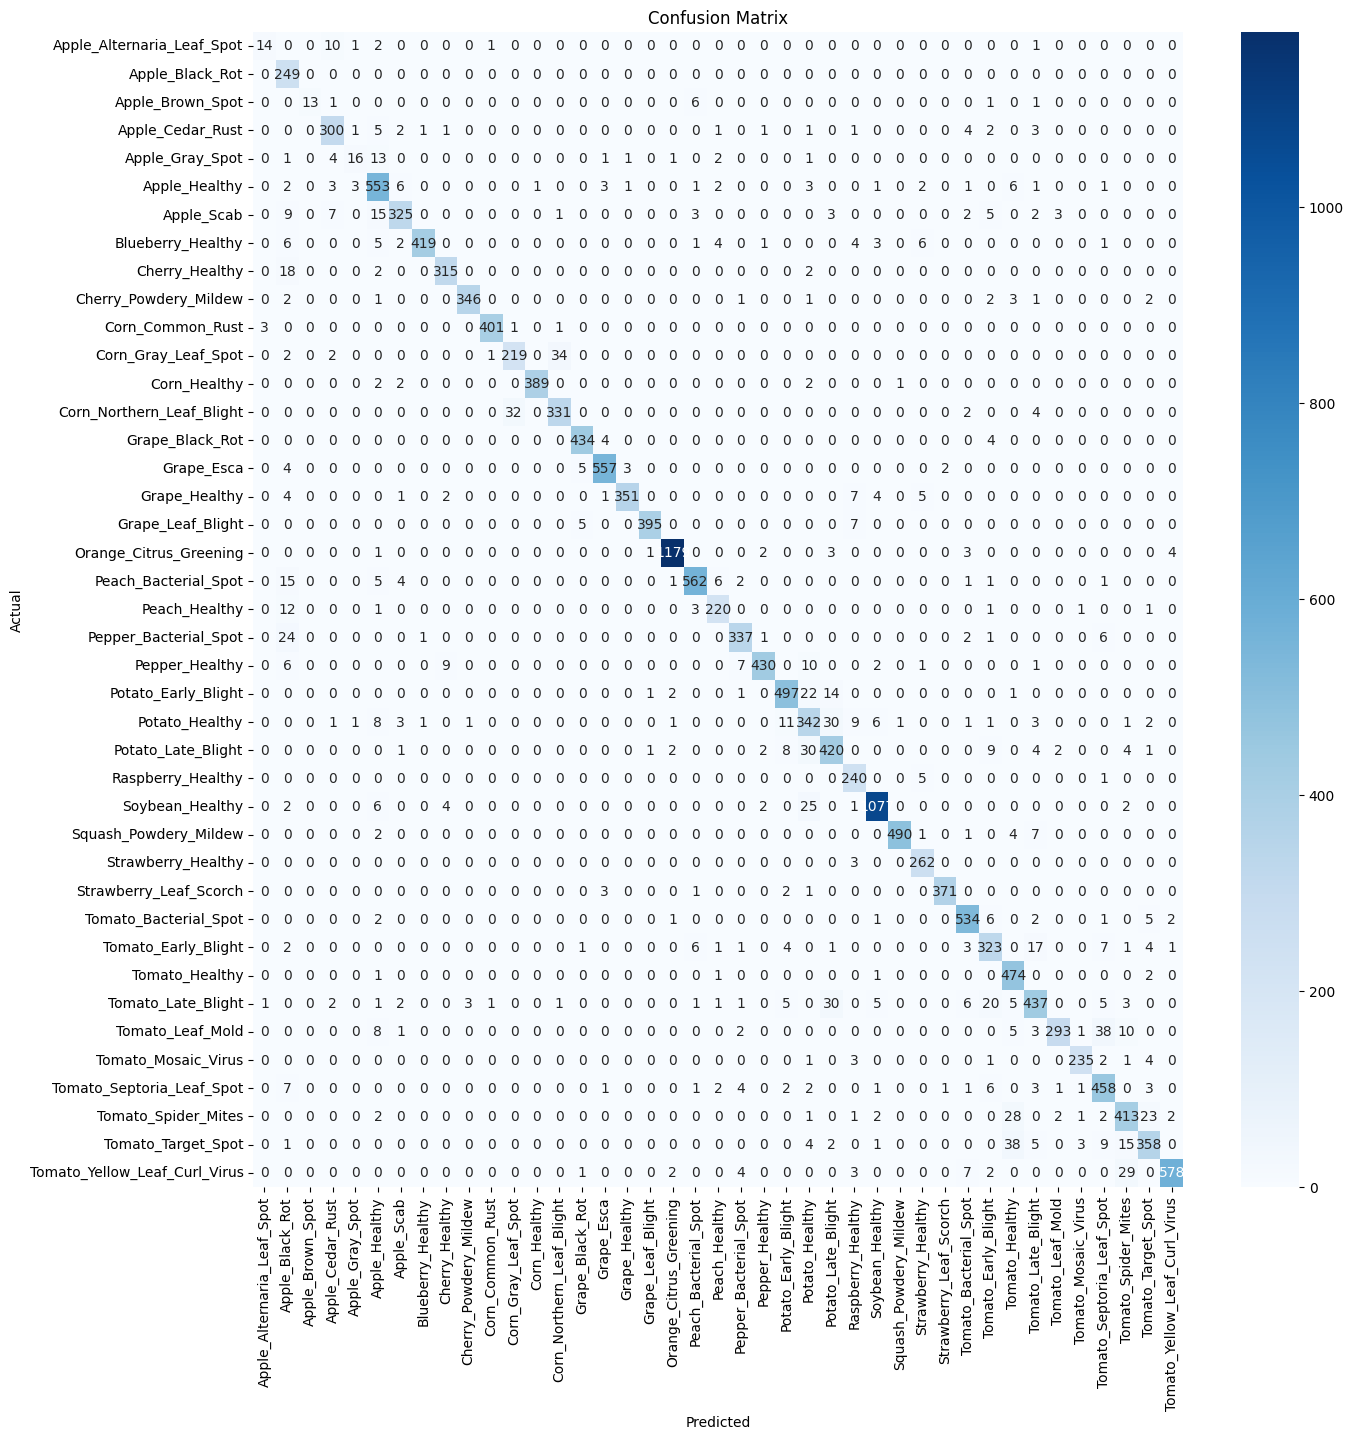


--- Step 6: Visualizing Training History ---


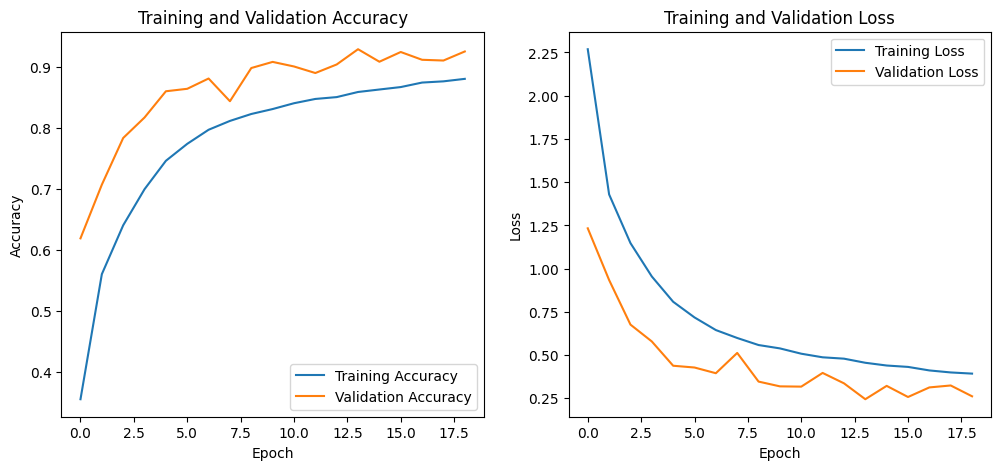


✅ All done! The best model has been saved as drishti_ai_custom_model_v1.keras


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ==============================================================================
# STEP 1: CONFIGURATION AND SETUP
# ==============================================================================
print("--- Step 1: Initializing Configuration ---")

# --- Parameters ---
BATCH_SIZE = 32
IMG_SIZE = (256, 256) # Must match the size from the data prep script
NUM_EPOCHS = 50       # Maximum number of epochs to train for
MODEL_NAME = 'drishti_ai_custom_model_v1.keras'

# --- Paths ---
# Path to the zip file created by the data preparation script
ZIP_FILE_PATH = './Drishti_AI_Master_Dataset_v1.zip'
# Directory to extract the dataset to
EXTRACT_DIR = './Drishti_AI_Master_Dataset_v1'

# Check if the dataset directory exists, if not, extract the zip file
if not os.path.exists(EXTRACT_DIR):
    print(f"Dataset directory not found. Extracting {ZIP_FILE_PATH}...")
    with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
        zip_ref.extractall('.')
    print("Extraction complete.")
else:
    print("Dataset directory already exists.")

TRAIN_DIR = os.path.join(EXTRACT_DIR, 'train')
VALIDATION_DIR = os.path.join(EXTRACT_DIR, 'validation')
TEST_DIR = os.path.join(EXTRACT_DIR, 'test')

# ==============================================================================
# STEP 2: LOAD AND PREPARE DATASETS
# ==============================================================================
print("\n--- Step 2: Loading and Preparing Datasets ---")

# Load training data
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

# Load validation data
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    shuffle=False, # No need to shuffle validation data
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

# Load test data
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    shuffle=False, # No need to shuffle test data
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

# Extract class names
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")

# Configure datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# ==============================================================================
# STEP 3: DEFINE CUSTOM CNN MODEL ARCHITECTURE
# ==============================================================================
print("\n--- Step 3: Defining Custom CNN Model Architecture ---")

# --- Data Augmentation Layer ---
# This helps prevent overfitting by creating modified versions of the training images
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# --- Build the Custom CNN Model ---
inputs = keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x) # Rescale pixel values to [0, 1]

# Block 1
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 2
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 3
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Classifier Head
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x) # Add dropout for regularization
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# --- Compile the Model ---
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ==============================================================================
# STEP 4: TRAIN THE MODEL
# ==============================================================================
print("\n--- Step 4: Starting Model Training ---")

# --- Callbacks ---
# Stop training early if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Save the best model found during training
model_checkpoint = ModelCheckpoint(MODEL_NAME, save_best_only=True)

history = model.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=validation_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

print("--- Training Complete ---")

# ==============================================================================
# STEP 5: EVALUATE THE MODEL
# ==============================================================================
print("\n--- Step 5: Evaluating Model Performance ---")

# Load the best model saved by ModelCheckpoint
best_model = keras.models.load_model(MODEL_NAME)

# Evaluate on the test set
loss, accuracy = best_model.evaluate(test_dataset)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# --- Classification Report and Confusion Matrix ---
print("\nGenerating classification report and confusion matrix...")
y_pred = []
y_true = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    preds = best_model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# ==============================================================================
# STEP 6: VISUALIZE TRAINING HISTORY
# ==============================================================================
print("\n--- Step 6: Visualizing Training History ---")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

print(f"\n✅ All done! The best model has been saved as {MODEL_NAME}")

